In [1]:
import os
from gensim import corpora, models, similarities
from pprint import pprint
from matplotlib import pyplot as plt
import logging

c:\users\as\miniconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from gensim import corpora
from collections import defaultdict
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# 去掉停用词
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# 去掉只出现一次的单词
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

dictionary = corpora.Dictionary(texts)   # 生成词典

# 将文档存入字典，字典有很多功能，比如
# diction.token2id 存放的是单词-id key-value对
# diction.dfs 存放的是单词的出现频率
dictionary.save('./temp/deerwester.dict')  # store the dictionary, for future reference
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('./temp/deerwester.mm', corpus)  # store to disk, for later use

In [3]:
def PrintDictionary(dictionary):
    ## diction.token2id 存放的是单词-id key-value对
    token2id = dictionary.token2id
    # diction.dfs 存放的是单词的出现频率
    dfs = dictionary.dfs
    token_info = {}
    for word in token2id:
        token_info[word] = dict(
            word = word,#前面是key，后面是value
            id = token2id[word],
            freq = dfs[token2id[word]]
        )
    token_items = token_info.values()
    token_items = sorted(token_items, key = lambda x:x['id'])
    print('The info of dictionary: ')
    pprint(token_items)
    print('--------------------------')

In [4]:
def Show2dCorpora(corpus):
    nodes = list(corpus)
    ax0 = [x[0][1] for x in nodes] # 绘制各个doc代表的点
    ax1 = [x[1][1] for x in nodes]
    # print(ax0)
    # print(ax1)
    plt.plot(ax0,ax1,'o')
    plt.show()

if (os.path.exists("./temp/deerwester.dict")):
    dictionary = corpora.Dictionary.load('./temp/deerwester.dict')
    corpus = corpora.MmCorpus('./temp/deerwester.mm')
    print("Used files generated from first tutorial")
else:
    print("Please run first tutorial to generate data set")

PrintDictionary(dictionary)

Used files generated from first tutorial
The info of dictionary: 
[{'freq': 2, 'id': 0, 'word': 'computer'},
 {'freq': 2, 'id': 1, 'word': 'human'},
 {'freq': 2, 'id': 2, 'word': 'interface'},
 {'freq': 2, 'id': 3, 'word': 'response'},
 {'freq': 2, 'id': 4, 'word': 'survey'},
 {'freq': 3, 'id': 5, 'word': 'system'},
 {'freq': 2, 'id': 6, 'word': 'time'},
 {'freq': 3, 'id': 7, 'word': 'user'},
 {'freq': 2, 'id': 8, 'word': 'eps'},
 {'freq': 3, 'id': 9, 'word': 'trees'},
 {'freq': 3, 'id': 10, 'word': 'graph'},
 {'freq': 2, 'id': 11, 'word': 'minors'}]
--------------------------


In [5]:
# 尝试将corpus(bow形式) 转化成tf-idf形式
tfidf_model = models.TfidfModel(corpus) # step 1 -- initialize a model 将文档由按照词频表示 转变为按照tf-idf格式表示
doc_bow = [(0, 1), (1, 1),[4,3]]
doc_tfidf = tfidf_model[doc_bow]

# 将整个corpus转为tf-idf格式
corpus_tfidf = tfidf_model[corpus]
# pprint(list(corpus_tfidf))
# pprint(list(corpus))

In [8]:
print(doc_tfidf)

[(0, 0.30151134457776363), (1, 0.30151134457776363), (4, 0.9045340337332909)]


In [6]:
## LSI模型 **************************************************
# 转化为lsi模型, 可用作聚类或分类
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi_model[corpus_tfidf]
nodes = list(corpus_lsi)
# pprint(nodes)
lsi_model.print_topics(2) # 打印各topic的含义

# ax0 = [x[0][1] for x in nodes] # 绘制各个doc代表的点
# ax1 = [x[1][1] for x in nodes]
# print(ax0)
# print(ax1)
# plt.plot(ax0,ax1,'o')
# plt.show()

lsi_model.save('./temp/model.lsi') # same for tfidf, lda, ...
lsi_model = models.LsiModel.load('./temp/model.lsi')
#  *********************************************************

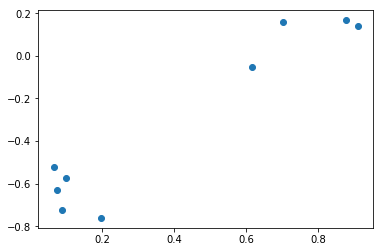

In [7]:
## LDA模型 **************************************************
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lda = lda_model[corpus_tfidf]   #其本质还是corpus
Show2dCorpora(corpus_lsi)
# nodes = list(corpus_lda)
# pprint(list(corpus_lda))

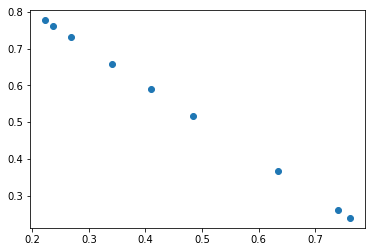

In [10]:
Show2dCorpora(corpus_lda)